## I. Utilisation des données / équipe

### a. Analyse du Calendrier

A partir du fichier *'Calendrier.xlsx'*, notre analyse consistera a observer les calendriers plus ou moins vavorables des différentes équipes afin de pouvoir beneficier de certains momentum pour le jeu Fantasy Premiere League

**Informations importantes sur les variables**
* *df_match* correspond au calendrier des equipes à partir de la Gameweek renseignee
* *df_fixt* correspond au note/equipe des prochains matchs

In [20]:
#Récuperation du calendrier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_match = pd.read_excel("Calendrier.xlsx")
df_match = df_match.set_index('Team')

In [21]:
nxt_gam = int(input('Quelle est la prochaine gameweek ? '))

Quelle est la prochaine gameweek ? 6


In [22]:
df_match = df_match.drop(df_match.iloc[:,0:nxt_gam-1],axis = 1)

nb_lig = df_match.shape[0]
nb_col = df_match.shape[1]

for i in range(0,nb_lig):
    for j in range(0,nb_col):
        try:
            df_match.iloc[i,j] = df_match.iloc[i,j].upper()
        except:
            df_match.iloc[i,j] = None
            
df_match

,GameWeek 6,GameWeek 7,GameWeek 8,GameWeek 9,GameWeek 10,GameWeek 11,GameWeek 12,GameWeek 13,GameWeek 14,GameWeek 15,...,GameWeek 29,GameWeek 30,GameWeek 31,GameWeek 32,GameWeek 33,GameWeek 34,GameWeek 35,GameWeek 36,GameWeek 37,GameWeek 38
Team,,,,,,,,,,,,,,,,,,,,,
ARS,LEI,MUN,AVL,LEE,WOL,TOT,BUR,SOU,EVE,CHE,...,WHU,LIV,SHU,FUL,EVE,NEW,WBA,CHE,CRY,BHA
AVL,LEE,SOU,ARS,BHA,WHU,NEW,WOL,BUR,WBA,CRY,...,SHU,FUL,LIV,MCI,WBA,EVE,MUN,CRY,TOT,CHE
BHA,WBA,TOT,BUR,AVL,LIV,SOU,LEI,FUL,SHU,WHU,...,NEW,MUN,EVE,CHE,SHU,LEE,WOL,WHU,MCI,ARS
BUR,TOT,CHE,BHA,CRY,MCI,EVE,ARS,AVL,WOL,LEE,...,LEI,SOU,NEW,MUN,WOL,WHU,FUL,LEE,LIV,SHU
CHE,MUN,BUR,SHU,NEW,TOT,LEE,EVE,WOL,WHU,ARS,...,LIV,WBA,CRY,BHA,WHU,FUL,MCI,ARS,LEI,AVL
CRY,FUL,WOL,LEE,BUR,NEW,WBA,TOT,WHU,LIV,AVL,...,MUN,EVE,CHE,SOU,LEI,MCI,SHU,AVL,ARS,LIV
EVE,SOU,NEW,MUN,FUL,LEE,BUR,CHE,LEI,ARS,SHU,...,WBA,CRY,BHA,TOT,ARS,AVL,WHU,SHU,WOL,MCI
FUL,CRY,WBA,WHU,EVE,LEI,MCI,LIV,BHA,NEW,SOU,...,LEE,AVL,WOL,ARS,TOT,CHE,BUR,SOU,MUN,NEW
LEE,AVL,LEI,CRY,ARS,EVE,CHE,WHU,NEW,MUN,BUR,...,FUL,SHU,MCI,LIV,MUN,BHA,TOT,BUR,SOU,WBA


In [4]:
dico_team = {}

#Best Team Rank
dico_team['LIV'] = 1
dico_team['MCI'] = 1

dico_team['TOT'] = 2
dico_team['CHE'] = 2

dico_team['ARS'] = 2
dico_team['EVE'] = 3
dico_team['MUN'] = 3
dico_team['LEI'] = 3

dico_team['WOL'] = 4
dico_team['CRY'] = 4
dico_team['LEE'] = 4
dico_team['AVL'] = 4

dico_team['WHU'] = 5
dico_team['SOU'] = 5
dico_team['NEW'] = 5
dico_team['BHA'] = 5

dico_team['BUR'] = 6
dico_team['WBA'] = 6
dico_team['FUL'] = 6
dico_team['SHU'] = 6

In [5]:
df_fixt = df_match.replace(dico_team)

In [6]:
data_fixt_3 = df_fixt.rolling(3, axis = 1).sum().dropna(axis=1)
data_fixt_5 = df_fixt.rolling(5, axis = 1).sum().dropna(axis=1)
data_fixt_10 = df_fixt.rolling(10, axis = 1).sum().dropna(axis=1)

In [7]:
best_team_3 = data_fixt_3.iloc[:,0].idxmax()
best_team_5 = data_fixt_5.iloc[:,0].idxmax()
best_team_10 = data_fixt_10.iloc[:,0].idxmax()

print('Les meilleurs fixtures pour les 3 prochains matchs sont pour :', best_team_3)
print('Les meilleurs fixtures pour les 5 prochains matchs sont pour :', best_team_5)
print('Les meilleurs fixtures pour les 10 prochains matchs sont pour :', best_team_10)

Les meilleurs fixtures pour les 3 prochains matchs sont pour : TOT
Les meilleurs fixtures pour les 5 prochains matchs sont pour : CRY
Les meilleurs fixtures pour les 10 prochains matchs sont pour : AVL


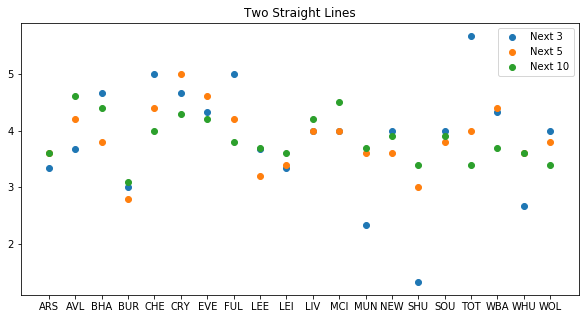

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(data_fixt_3.index.tolist(),data_fixt_3.iloc[:,0]/3, label='Next 3')
plt.scatter(data_fixt_5.index.tolist(),data_fixt_5.iloc[:,0]/5, label='Next 5')
plt.scatter(data_fixt_10.index.tolist(),data_fixt_10.iloc[:,0]/10, label='Next 10')
plt.title('Two Straight Lines')
plt.legend(loc = 'best')
plt.show()

### b. Analyse selon les Attaques et les Defenses

### c. Analyse des cotes de Paris Sportifs

*  *  *

## II. Startegie Top Down via API FPL

Un fois avoir anaylser les equipes sur lesquelles il était souhaitable de parier aux vus des prochains matchs, cette seconde partie est principalement orientée sur les joueurs présents au sein de ces équipes.

### a. Telechargement de l'API FPL

L'API : "https://fantasy.premierleague.com/api/bootstrap-static/" reprend l'ensemble des données utilisées par le jeu FPL. Il regroupe aussi bien des infos par équipes mais également des informations relatives aux joueurs.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import json
import requests

In [10]:
def get_json(file_path):
    r = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
    jsonResponse = r.json()
    with open(file_path, 'w') as outfile:
        json.dump(jsonResponse, outfile)

In [11]:
get_json('C:/Users/jesti/OneDrive/Documents/01. Perso/FPL - Fantasy Premiere League/fpl.json')

with open('C:/Users/jesti/OneDrive/Documents/01. Perso/FPL - Fantasy Premiere League/fpl.json') as json_data:
    d = json.load(json_data)
    print(list(d.keys()))

['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types']


### b. Data Teams

In [12]:
df_teams = pd.json_normalize(d['teams'])
df_teams = df_teams.set_index('id') #'name'
df_teams = df_teams.drop(['code', 'form','team_division', 'pulse_id'], axis=1)

In [13]:
df_teams

,draw,loss,name,played,points,position,short_name,strength,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away
id,,,,,,,,,,,,,,,,
1,0,0,Arsenal,0,0,0,ARS,4,False,0,1240,1250,1160,1210,1190,1230
2,0,0,Aston Villa,0,0,0,AVL,3,False,0,1130,1150,1140,1170,1120,1160
3,0,0,Brighton,0,0,0,BHA,3,False,0,1100,1120,1110,1130,1100,1120
4,0,0,Burnley,0,0,0,BUR,3,False,0,1060,1100,1130,1150,1010,1020
5,0,0,Chelsea,0,0,0,CHE,4,False,0,1250,1280,1180,1250,1230,1260
6,0,0,Crystal Palace,0,0,0,CRY,3,False,0,1080,1120,1100,1130,1020,1040
7,0,0,Everton,0,0,0,EVE,4,False,0,1200,1210,1160,1220,1210,1240
8,0,0,Fulham,0,0,0,FUL,2,False,0,1000,1020,1020,1020,1000,1010
9,0,0,Leicester,0,0,0,LEI,4,False,0,1200,1240,1190,1230,1200,1230


### c. Data Players

In [14]:
df_players = pd.json_normalize(d['elements'])
df_players = df_players.set_index('web_name')
#Poste des Joueurs
df_players['element_type']=df_players['element_type'].replace(1,'GKP').replace(2,'DEF').replace(3,'MID').replace(4,'FWD')
#Nom Equipe
df_players['team'] = df_players['team'].map(df_teams.to_dict()['name'])

In [15]:
df_teams.to_dict()['name']

{1: 'Arsenal',
 2: 'Aston Villa',
 3: 'Brighton',
 4: 'Burnley',
 5: 'Chelsea',
 6: 'Crystal Palace',
 7: 'Everton',
 8: 'Fulham',
 9: 'Leicester',
 10: 'Leeds',
 11: 'Liverpool',
 12: 'Man City',
 13: 'Man Utd',
 14: 'Newcastle',
 15: 'Sheffield Utd',
 16: 'Southampton',
 17: 'Spurs',
 18: 'West Brom',
 19: 'West Ham',
 20: 'Wolves'}

On s'interesse a présent aux joueurs d'une équipe en particulier : par exemple, Everton

In [16]:
# Designe l'équipe que l'on souhaite analyser
ana_team = str(input('Quelle equipe analyser ? '))

Quelle equipe analyser ? Man Utd


In [17]:
df_ana_team = df_players[df_players['team']==ana_team]
df_ana_team

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
web_name,,,,,,,,,,,,,,,,,,,,,
Romero,0.0,0.0,42899,0,0,-1,1,0,GKP,0.0,...,476,48,511,61,NaN,,NaN,,NaN,
Mata,NaN,NaN,43670,0,0,-1,1,0,MID,1.2,...,194,103,191,91,4.0,,4.0,,5.0,
de Gea,NaN,NaN,51940,0,0,0,0,0,GKP,1.2,...,551,60,196,13,NaN,,NaN,,NaN,
Smalling,0.0,0.0,55909,0,0,-1,1,0,DEF,0.0,...,479,189,514,198,NaN,,NaN,,NaN,
Ighalo,NaN,NaN,58498,0,0,-2,2,0,FWD,0.2,...,301,48,373,49,NaN,,NaN,,NaN,
Rojo,NaN,NaN,58893,0,0,-1,1,0,DEF,0.0,...,481,191,516,200,NaN,,NaN,,NaN,
Matic,NaN,NaN,62398,0,0,0,0,0,MID,1.5,...,235,121,263,121,NaN,,NaN,,NaN,
Pogba,NaN,NaN,74208,-1,1,-2,2,0,MID,1.8,...,189,101,236,112,NaN,,3.0,,3.0,
Jones,0.0,0.0,76359,0,0,-1,1,0,DEF,0.0,...,484,192,519,201,NaN,,NaN,,NaN,


In [18]:
df_obj = df_ana_team[df_ana_team['points_per_game'].astype(float)>1]
df_obj['points_per_game']

web_name
Mata           5.0
de Gea         1.2
Matic          2.0
Pogba          1.8
Maguire        2.8
Fred           1.3
Fernandes      7.8
Martial        1.7
Rashford       6.5
Lindelöf       1.3
McTominay      1.7
Wan-Bissaka    2.7
Greenwood      1.7
van de Beek    2.2
Name: points_per_game, dtype: object

*  *  *

In [23]:
i = nxt_gam - 1

def get_json_gw (file_path):
    r = requests.get('https://fantasy.premierleague.com/api/event/' + str(i) + '/live/')
    jsonResponse = r.json()
    with open(file_path, 'w') as outfile:
        json.dump(jsonResponse, outfile)

In [24]:
get_json_gw('C:/Users/jesti/OneDrive/Documents/01. Perso/FPL - Fantasy Premiere League/gw ' + str(i) + '.json')

with open('C:/Users/jesti/OneDrive/Documents/01. Perso/FPL - Fantasy Premiere League/gw ' + str(i) + '.json') as json_data:
    d = json.load(json_data)
    print(list(d.keys()))

['elements']


In [33]:
df_gw_5 = pd.json_normalize(d['elements'])
df_gw_5.columns

Index(['id', 'explain', 'stats.minutes', 'stats.goals_scored', 'stats.assists',
       'stats.clean_sheets', 'stats.goals_conceded', 'stats.own_goals',
       'stats.penalties_saved', 'stats.penalties_missed', 'stats.yellow_cards',
       'stats.red_cards', 'stats.saves', 'stats.bonus', 'stats.bps',
       'stats.influence', 'stats.creativity', 'stats.threat',
       'stats.ict_index', 'stats.total_points', 'stats.in_dreamteam'],
      dtype='object')

In [36]:
df_gw_5.explain[2]

[{'fixture': 44,
  'stats': [{'identifier': 'minutes', 'points': 2, 'value': 90}]}]